In [328]:
import pandas as pd
import seaborn as sns

## Load Data

In [329]:
# Load the metadata
meta = pd.read_csv("../metadata/metadata.csv", index_col="well")

# Load the OD600 data
data = pd.read_csv("../data/data.csv", index_col="time_mins")

# Limit data to actual wells
data = data.loc[data.well.isin(meta.index)]

# Add metadata to data
data = data.join(meta, on='well')

# Generate background data
# background is the mean value for water at a given stool conc. at a given time point.
# This is actually just a single well each..
bg = data.reset_index().copy(deep=True)

# restrict to water wells
bg = bg.loc[bg.polysacc == "water"]

# groupby variables of interest and take mean(OD600)
bg = bg.groupby(["time_mins", "sample", "sample_dilution"])["OD600"].mean().to_frame(name='bg')

# reset index prior to merge
bg = bg.reset_index()

# merge data
data = data.merge(bg, on=["time_mins", "sample", "sample_dilution"])

# compute h2o normalized OD600
data['norm_OD600'] = data.OD600 / data.bg

# compute h20 bg corrected (subtracted) OD600
data['corr_OD600'] = data.OD600 - data.bg

In [330]:
data.head()

,time_mins,temp,well,OD600,polysacc,sample,sample_type,sample_day,sample_dilution,bg,norm_OD600,corr_OD600
0,0,36.3,B02,0.219,water,jxe.067,jax_control,2,1.0,0.219,1.0,-1.110223e-16
1,0,36.3,B02,0.219,water,jxe.067,jax_control,2,1.0,0.219,1.0,-1.110223e-16
2,0,36.3,B02,0.219,water,jxe.067,jax_control,2,1.0,0.219,1.0,-1.110223e-16
3,0,36.3,B02,0.219,water,jxe.067,jax_control,2,1.0,0.219,1.0,-1.110223e-16
4,0,36.3,B02,0.219,water,jxe.067,jax_control,2,1.0,0.219,1.0,-1.110223e-16


## Overview of Data

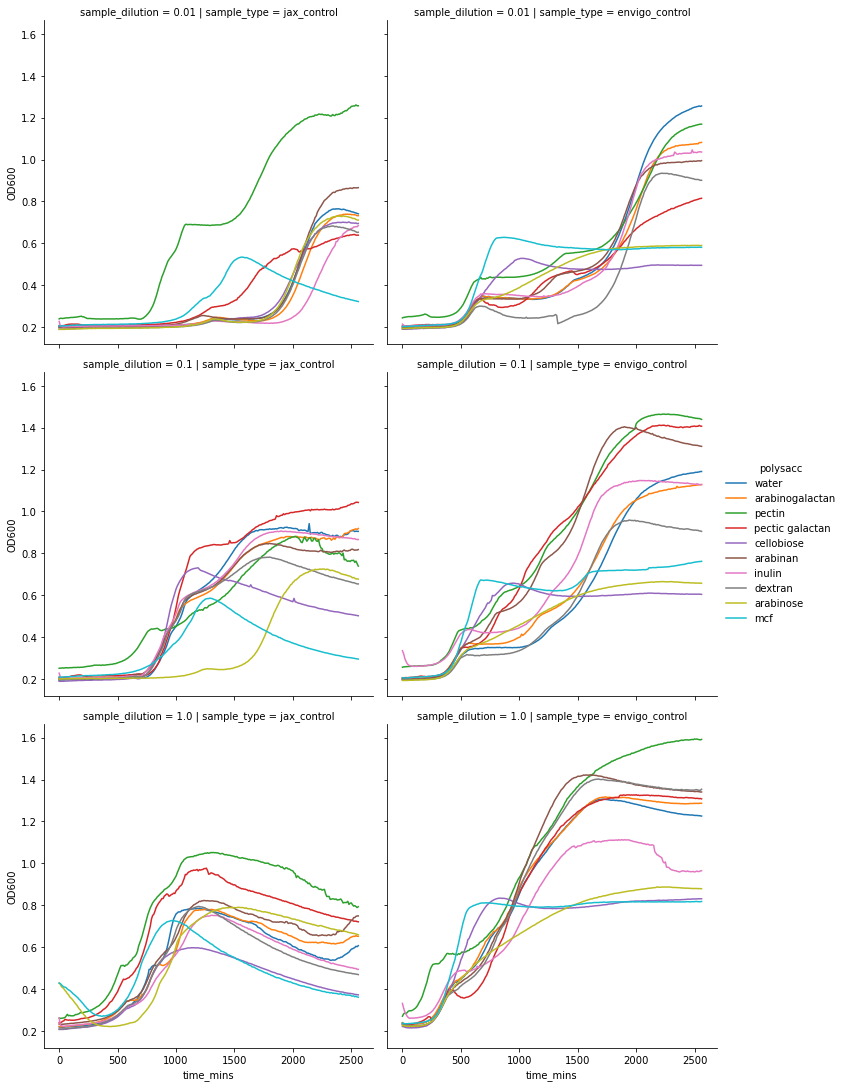

In [331]:
sns.relplot(kind='line', data=data, x='time_mins', y='OD600', hue='polysacc', 
            col="sample_type", row="sample_dilution", ci=None)

## Relative to water analysis

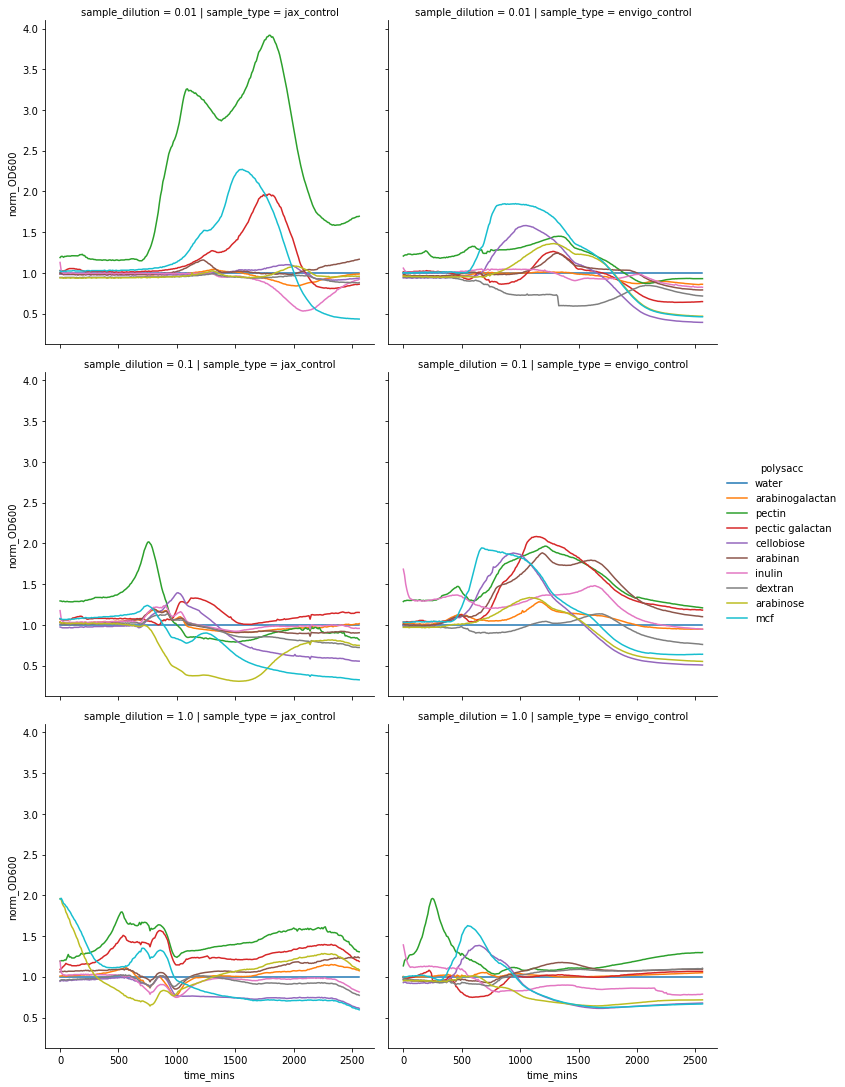

In [332]:
sns.relplot(kind='line', data=data, x='time_mins', y='norm_OD600', hue='polysacc', 
            col="sample_type", row="sample_dilution", ci=None)

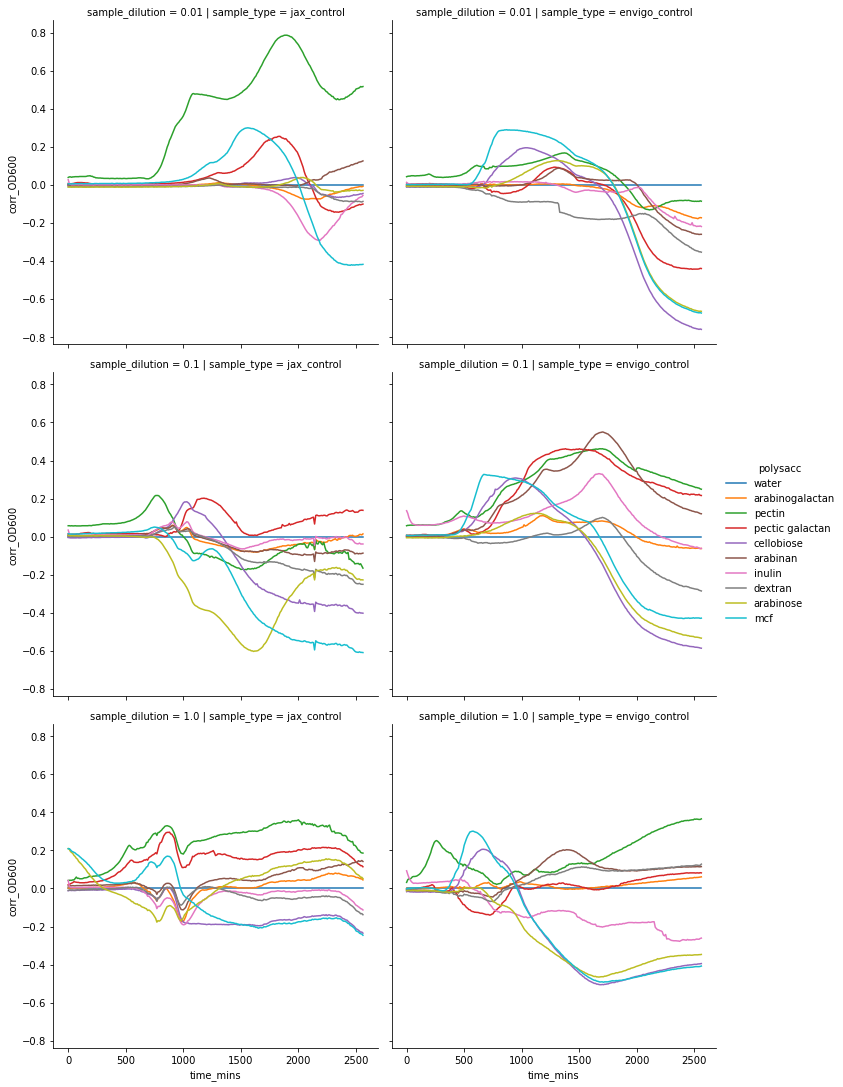

In [333]:
sns.relplot(kind='line', data=data, x='time_mins', y='corr_OD600', hue='polysacc', 
            col="sample_type", row="sample_dilution", ci=None)